## Part1: Plotting the Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt("ex1data1.txt", delimiter=",")

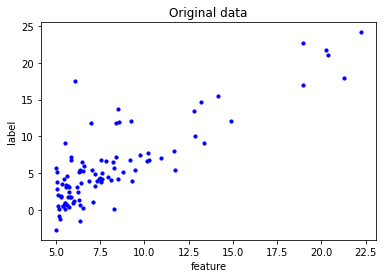

In [3]:
X = data[:, 0]
Y = data[:, 1]
plt.figure()
plt.scatter(X, Y, c="b", s=10)
plt.title("Original data")
plt.xlabel("feature")
plt.ylabel("label")
plt.show()

## Part2: Data preprocessing
Feature scaling and mean normalization

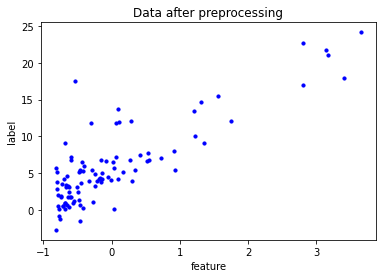

In [4]:
mu = np.mean(X)
sigma = np.std(X)
X = (X - mu) / sigma
plt.figure()
plt.scatter(X, Y, c="b", s=10)
plt.title("Data after preprocessing")
plt.xlabel("feature")
plt.ylabel("label")
plt.show()

## Part3: Gradient desent

### preparing

In [5]:
theta = np.zeros((2, 1), dtype="float")# Initial point
alpha = 0.01 # Learning rate
iteration_max = 3500
m = len(X)
X = np.hstack((np.ones((m, 1)), X.reshape(m, 1)))# In this way, J=norm(X theta - Y)^2

### Cost function

In [6]:
def cost(theta, X, Y):
    return np.sum(np.square(X.dot(theta) - Y))/(2 * m)

### Gradient Desent

In [7]:
def gradient_desent(theta, X, Y, alpha, iteration_max):
    step = 1
    cost_list = []
    cost_list.append(cost(theta, X, Y))
    while step < iteration_max:
        theta -= alpha / m * (np.transpose(X).dot(X.dot(theta) - Y))
        # theta -= alpha / m * ((X.dot(theta) - Y).T.dot(X))
        cost_temp = cost(theta, X, Y)
        cost_list.append(cost_temp)
        step += 1
    return theta, cost_list

### Iteration 

In [8]:
Y = Y.reshape((m, 1))
tehta, cost_list = gradient_desent(theta, X, Y, alpha, iteration_max)

### Loss

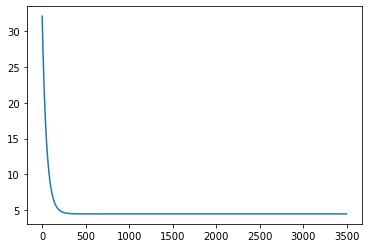

In [9]:
len(cost_list)
plt.figure()
plt.plot(cost_list)
plt.show()

### Linear fit

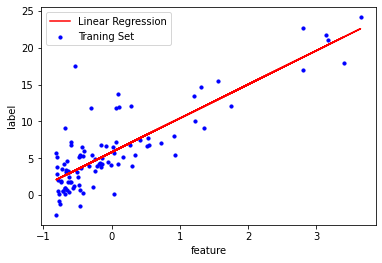

In [10]:
plt.figure()
plt.scatter(X[:,1], Y, c="b", s=10, label="Traning Set")
#plt.plot(X[:, 1], Y, linestyle="", marker="o", color="b", label="Traing Set")
plt.plot(X[:, 1], X.dot(theta), color="r", label="Linear Regression")
plt.legend(loc='upper left', numpoints=1)
plt.xlabel("feature")
plt.ylabel("label")
plt.show()

## Part4: Linear Regression with Multiple Variables

In [11]:
data2 = np.loadtxt('ex1data2.txt', dtype=float, delimiter=',')
sn = data2[:, [0, 1]]# size and number of bedrooms
p = data2[:, 2]# price
print(len(sn))

47


### Feature Scaling

In [12]:
m1 = np.mean(sn[:, 0])
r1 = np.max(sn[:, 0]) - np.min(sn[:, 0])
sn[:, 0] = (sn[:, 0] - m1) / r1
m2 = np.mean(sn[:, 1])
r2 = np.max(sn[:, 1]) - np.min(sn[:, 1])
sn[:, 1] = (sn[:, 1] - m2) / r2
print(sn.shape)

(47, 2)


In [13]:
sn = np.hstack((np.ones((len(sn), 1)), sn))
p = p.reshape((len(sn), 1))
print(sn.shape)
print(p.shape)

(47, 3)
(47, 1)


In [14]:
def cost_multi(theta, X, y):
    return (1 / (2 * len(X))) * np.sum(np.square(X @ theta - y))

In [15]:
def gradient_multi(theta, X, y):
    return (1 / len(X)) * (np.dot(X.T, X) @ theta - X.T @ y)

In [16]:
alpha_multi = 0.03 # learning rate
theta_multi = np.zeros((sn.shape[1], 1))
cost_list_multi = []
cost_list_multi.append(cost_multi(theta_multi, sn, p))
k = 0
while k < iteration_max:
    theta_multi -= (alpha_multi / len(sn)) * gradient_multi(theta_multi, sn, p)
    cost_list_multi.append(cost_multi(theta_multi, sn, p))
    k += 1

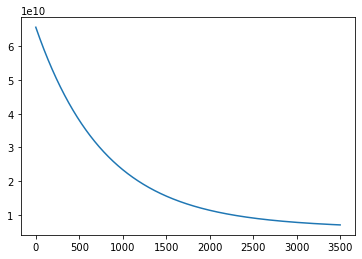

In [17]:
plt.figure()
plt.plot(cost_list_multi)
plt.show()